# Actual v Schedule Comparison
### Comparing the tracked positions of trains to the schedule

### Create Gold Line object

In [2]:
import json
from analyzer.line import Line

track = json.load(open('data/GTFS/goldJSON.json'))
stations = json.load(open('data/GTFS/GoldLineStationIds.json'))['items']
gold_line = Line(804, track, stations, None)
"DONE"

'DONE'

### Load tracking and schedule data

In [2]:
import pandas as pd
analyzed = pd.read_csv('data/analysis_window_NEXTBUS-oct30.csv', parse_dates=['datetime'])
schedule = pd.read_csv('data/analysis_window_schedule.csv', parse_dates=['datetime'])

## Separate trips by direction for both tracked data and schedule

Schedule direction selector needs to be improved to account for trips not going to end of line

In [3]:
northbound = analyzed.loc[analyzed['direction'] == 0.]
southbound = analyzed.loc[analyzed['direction'] == 180.]
schedule_northbound = schedule[schedule['stop_headsign'] == '804 - Azusa / Citrus']
schedule_southbound = schedule[schedule['stop_headsign'] == '804 - Atlantic Station']

# Generate Marey Diagrams (time/space plots)

Colored lines show tracked vehicle trips while grey/white lines show the scheduled trips. Vertical dotted grey lines are station positions.

In [4]:
from analyzer.visualizer import Marey
start_date = pd.to_datetime('10/30/18 06:00:00')
end_date = pd.to_datetime('10/30/18 07:00:00')
northPlot = Marey(gold_line.stations, start_date, end_date, northbound, schedule_northbound)
southPlot = Marey(gold_line.stations, start_date, end_date, southbound, schedule_southbound)

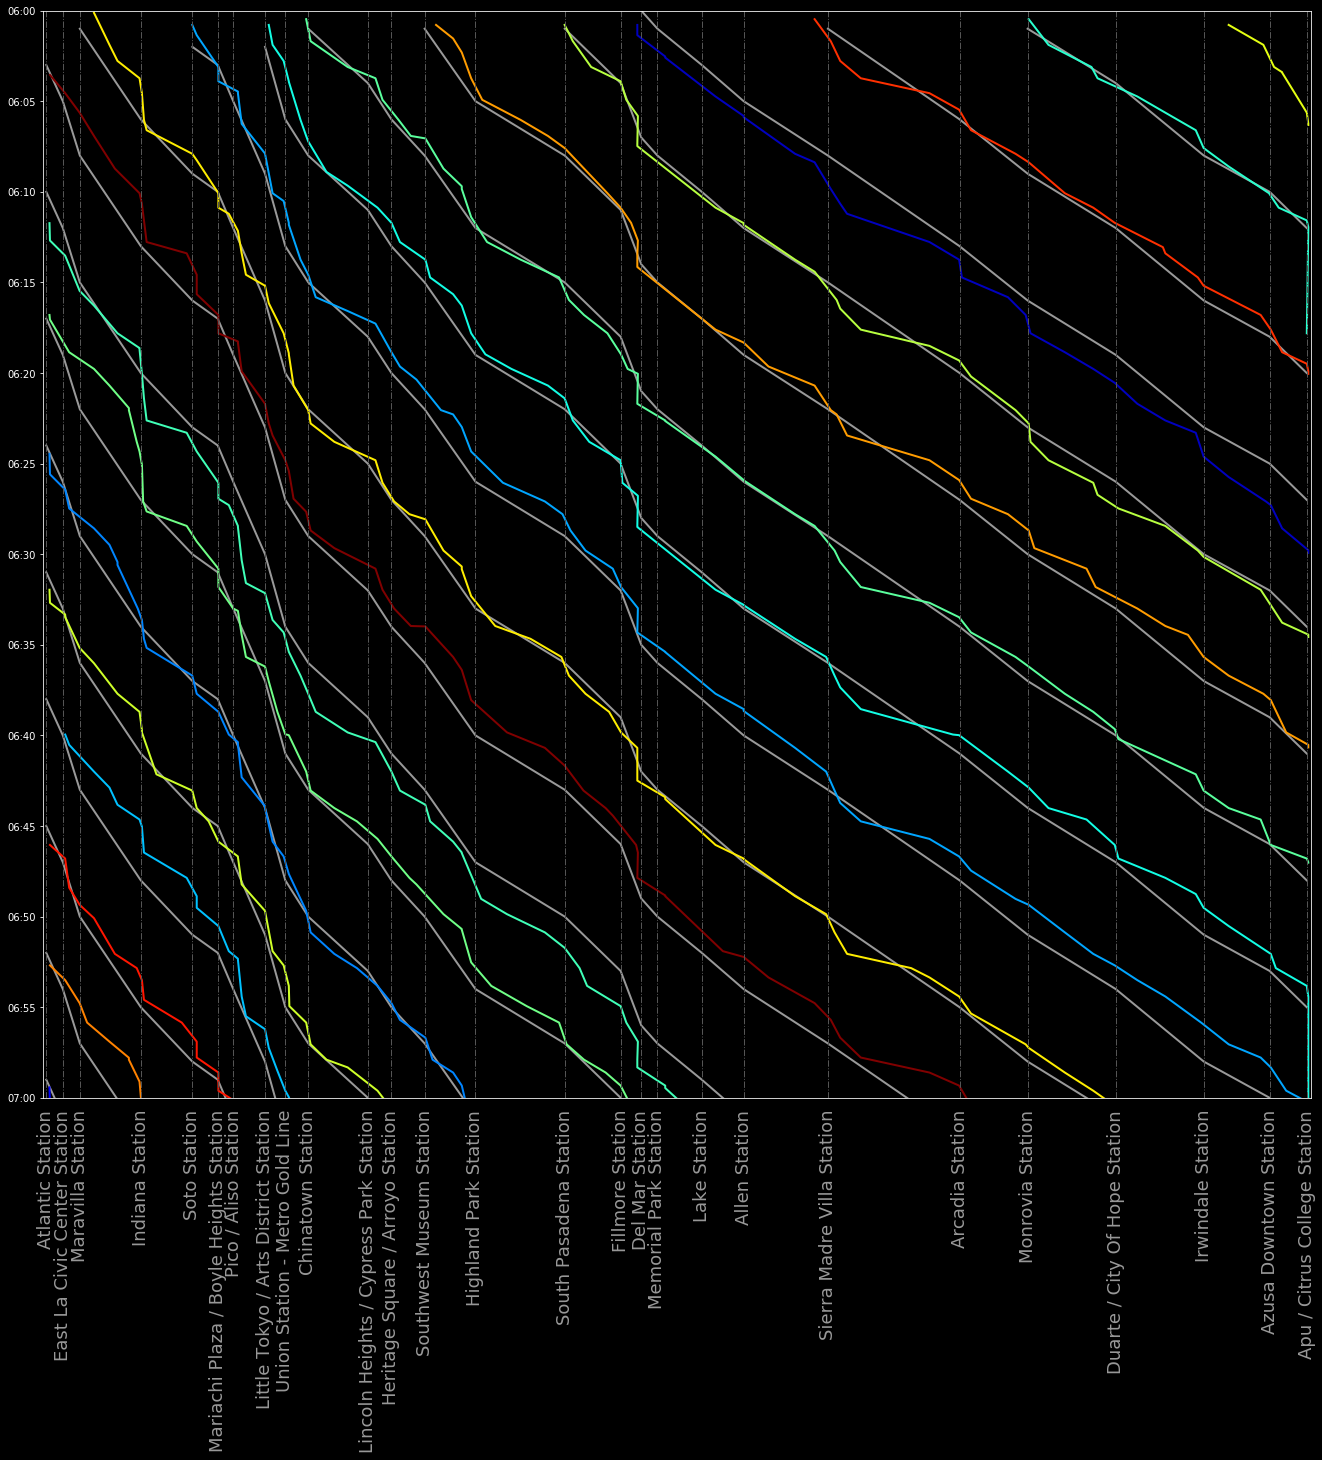

In [8]:
northPlot.plot(50, 20)

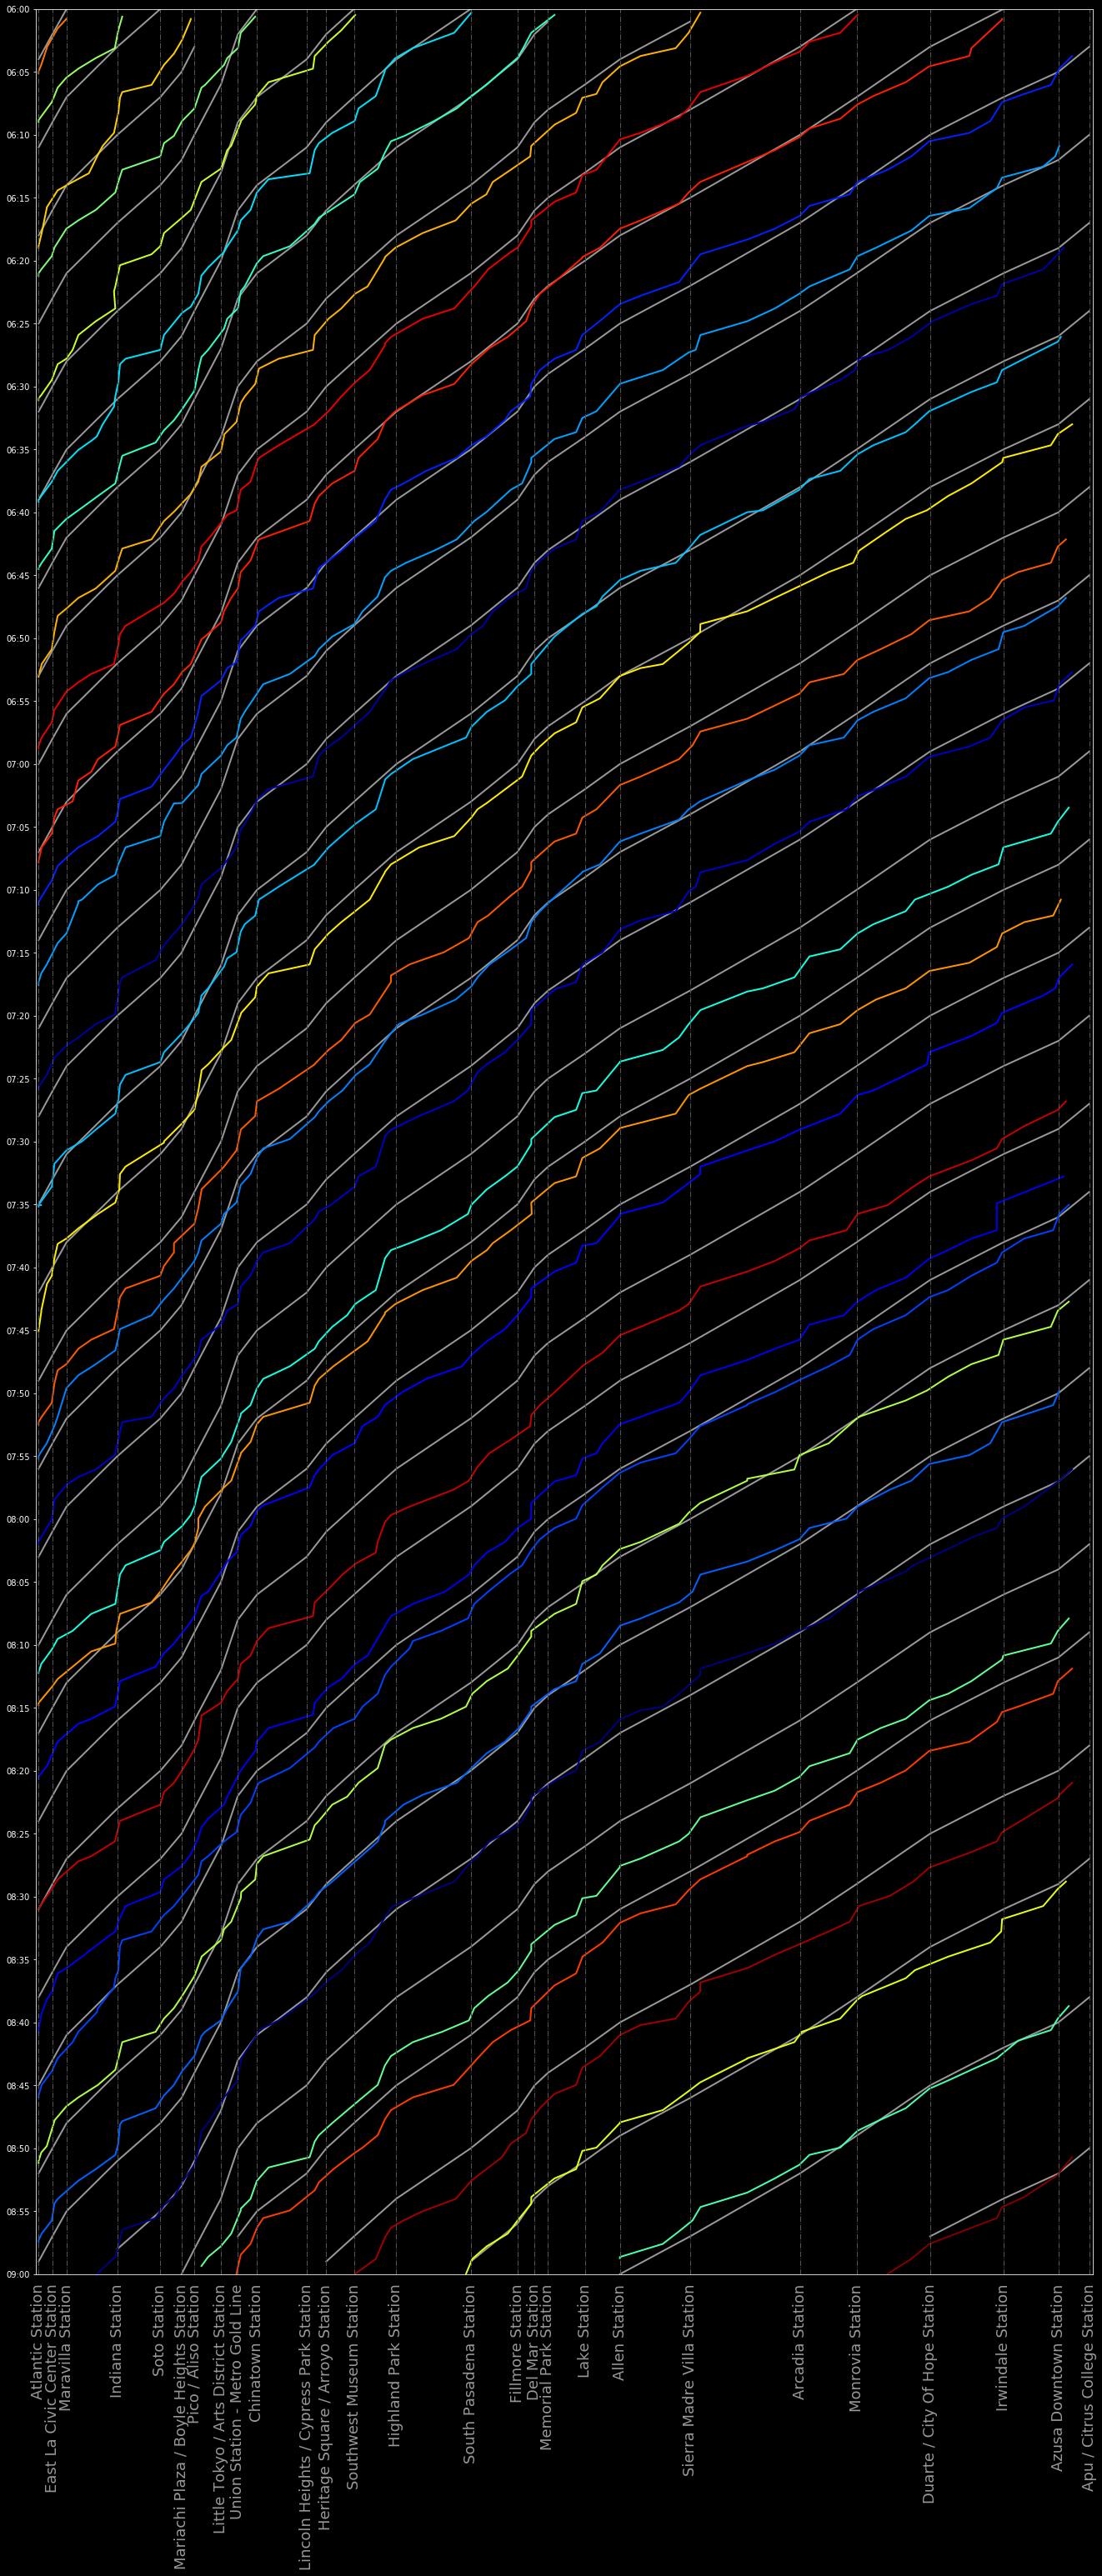

In [21]:
southPlot.plot(50, 50)